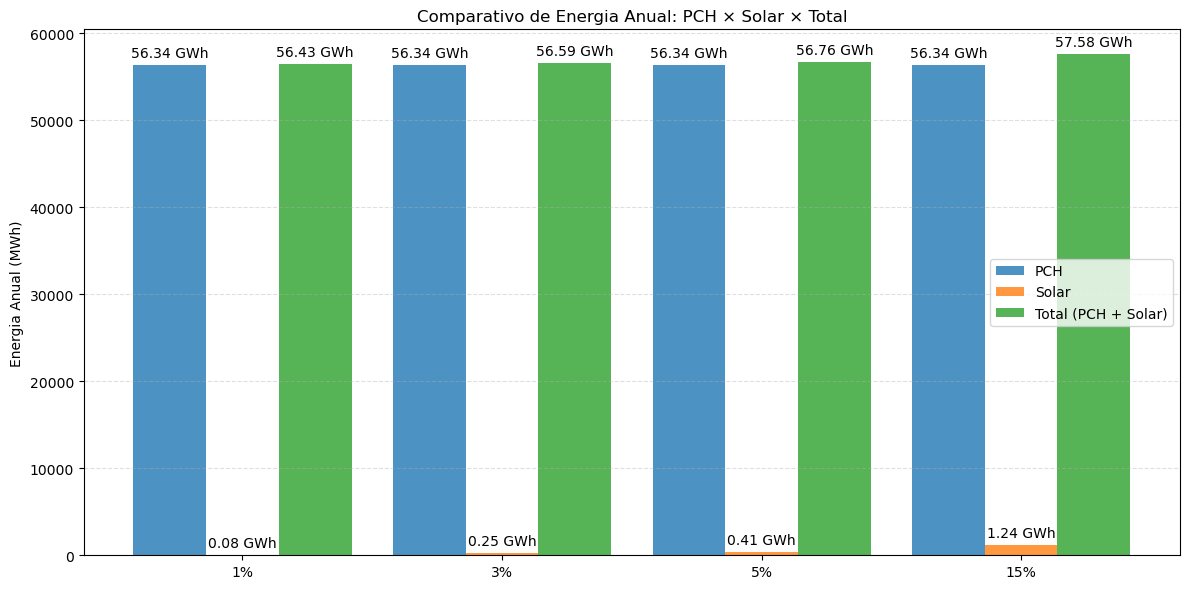

Gráfico salvo em: Gráficos/Comparativo_PCH_Solar_Total.png


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# ===============================
# CRIAR PASTA "Gráficos"
# ===============================
os.makedirs("Gráficos", exist_ok=True)

# ===============================
# DADOS
# ===============================

pch = 56342.95686  # MWh

solar = {
    "1%": 83.14,
    "3%": 247.74,
    "5%": 412.34,
    "15%": 1237.02
}

cenarios = list(solar.keys())
energia_solar = np.array(list(solar.values()))
energia_pch = np.array([pch] * len(cenarios))
energia_total = energia_pch + energia_solar

# ===============================
# GRÁFICO
# ===============================

x = np.arange(len(cenarios))
largura = 0.28

plt.figure(figsize=(12, 6))

# Barras reais
barras_pch   = plt.bar(x - largura, energia_pch, width=largura, label="PCH", alpha=0.8)
barras_solar = plt.bar(x, energia_solar, width=largura, label="Solar", alpha=0.8)
barras_total = plt.bar(x + largura, energia_total, width=largura, label="Total (PCH + Solar)", alpha=0.8)

plt.xticks(x, cenarios)
plt.ylabel("Energia Anual (MWh)")
plt.title("Comparativo de Energia Anual: PCH × Solar × Total")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()

# Rótulos
def rotular(barras):
    for b in barras:
        altura = b.get_height()
        plt.text(
            b.get_x() + b.get_width()/2,
            altura + max(energia_total)*0.01,
            f"{altura/1000:.2f} GWh",
            ha='center',
            va='bottom'
        )

rotular(barras_pch)
rotular(barras_solar)
rotular(barras_total)

plt.tight_layout()

# ===============================
# SALVAR GRÁFICO NA PASTA
# ===============================
plt.savefig("Gráficos/Comparativo_PCH_Solar_Total.png", dpi=300, bbox_inches='tight')

plt.show()

print("Gráfico salvo em: Gráficos/Comparativo_PCH_Solar_Total.png")
